 Entrena una red neuronal para que reproduzca la siguientes funciones en el  intervalo  de  $[-1,1]$. Graficar  la  solucion  de la red en conjunto con la grafica de la funcion.

(a)  $3 sin(πx)$

(b)  $1 + 2x+ 4x^3$ 
 

# $3 sin(πx)$

In [135]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

In [136]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [137]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=tf.shape(data)[0]
        x=tf.random.uniform((batch_size,1),minval=-2,maxval=2)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            y_pred = self(x, training=True)
            eq = 3*tf.math.sin(math.pi*x)
            loss= keras.losses.mean_squared_error(eq, y_pred)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [138]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [139]:
model.summary()

Model: "od_esolver_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 10)                20        
                                                                 
 dense_90 (Dense)            (None, 10)                110       
                                                                 
 dense_91 (Dense)            (None, 10)                110       
                                                                 
 dense_92 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [145]:
model.compile(optimizer = RMSprop(), metrics=['loss'])

x= tf.linspace(-2,2,100)
history = model.fit(x, epochs=1000, verbose=1)

x_testv = tf.linspace(-2,2,100)
a = model.predict(x_testv)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 2/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0115
Epoch 3/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0048
Epoch 4/1000
4/4 [==============================] - 0s 502us/step - loss: 0.0044
Epoch 5/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0104
Epoch 6/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0038
Epoch 7/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0048
Epoch 8/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0137
Epoch 9/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0155
Epoch 10/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0052
Epoch 11/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0018
Epoch 12/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0025
Epoch 13/1000
4/4 [========

4/4 [==============================] - 0s 333us/step - loss: 0.0053
Epoch 102/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0270
Epoch 103/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 104/1000
4/4 [==============================] - 0s 689us/step - loss: 0.0020
Epoch 105/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0020
Epoch 106/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0153
Epoch 107/1000
4/4 [==============================] - 0s 722us/step - loss: 0.0069
Epoch 108/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0049
Epoch 109/1000
4/4 [==============================] - 0s 697us/step - loss: 0.0063
Epoch 110/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0137
Epoch 111/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0040
Epoch 112/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0054
Epoch 113/1000
4/4

Epoch 200/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0044
Epoch 201/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 202/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0018
Epoch 203/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0063
Epoch 204/1000
4/4 [==============================] - 0s 670us/step - loss: 0.0083
Epoch 205/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0066
Epoch 206/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 207/1000
4/4 [==============================] - 0s 376us/step - loss: 0.0103
Epoch 208/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0181
Epoch 209/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 210/1000
4/4 [==============================] - 0s 735us/step - loss: 0.0043
Epoch 211/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0058
Epoch 

4/4 [==============================] - 0s 667us/step - loss: 0.0080
Epoch 299/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0060
Epoch 300/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0079
Epoch 301/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0062
Epoch 302/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0088
Epoch 303/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0057
Epoch 304/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 305/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0068
Epoch 306/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0045
Epoch 307/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0057
Epoch 308/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0225
Epoch 309/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0051
Epoch 310/1000
4/4 

Epoch 397/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0082
Epoch 398/1000
4/4 [==============================] - 0s 686us/step - loss: 0.0137
Epoch 399/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0119
Epoch 400/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0035
Epoch 401/1000
4/4 [==============================] - 0s 718us/step - loss: 0.0036
Epoch 402/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0046
Epoch 403/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0123
Epoch 404/1000
4/4 [==============================] - 0s 695us/step - loss: 0.0071
Epoch 405/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0025
Epoch 406/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0040
Epoch 407/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0059
Epoch 408/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0211
Epoc

4/4 [==============================] - 0s 667us/step - loss: 0.0086
Epoch 496/1000
4/4 [==============================] - 0s 836us/step - loss: 0.0107
Epoch 497/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0183
Epoch 498/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 499/1000
4/4 [==============================] - 0s 669us/step - loss: 0.0026
Epoch 500/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0048
Epoch 501/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0175
Epoch 502/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0044
Epoch 503/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0030
Epoch 504/1000
4/4 [==============================] - 0s 708us/step - loss: 0.0085
Epoch 505/1000
4/4 [==============================] - 0s 697us/step - loss: 0.0158
Epoch 506/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0027
Epoch 507/1000
4/4 

Epoch 594/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0077
Epoch 595/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0028
Epoch 596/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0042
Epoch 597/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 598/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0100
Epoch 599/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0110
Epoch 600/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0074
Epoch 601/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0017
Epoch 602/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0042
Epoch 603/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0158
Epoch 604/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0052
Epoch 605/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0046
Epoch

4/4 [==============================] - 0s 667us/step - loss: 0.0148
Epoch 693/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0071
Epoch 694/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0036
Epoch 695/1000
4/4 [==============================] - 0s 665us/step - loss: 0.0033
Epoch 696/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0151
Epoch 697/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0040
Epoch 698/1000
4/4 [==============================] - 0s 358us/step - loss: 0.0019
Epoch 699/1000
4/4 [==============================] - 0s 746us/step - loss: 0.0055
Epoch 700/1000
4/4 [==============================] - 0s 502us/step - loss: 0.0237
Epoch 701/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0088
Epoch 702/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0030
Epoch 703/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0023
Epoch 704/1000
4/4 

4/4 [==============================] - 0s 667us/step - loss: 0.0021
Epoch 791/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 792/1000
4/4 [==============================] - 0s 694us/step - loss: 0.0111
Epoch 793/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0032
Epoch 794/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0043
Epoch 795/1000
4/4 [==============================] - 0s 712us/step - loss: 0.0142
Epoch 796/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0087
Epoch 797/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0052
Epoch 798/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0064
Epoch 799/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0092
Epoch 800/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0085
Epoch 801/1000
4/4 [==============================] - 0s 690us/step - loss: 0.0055
Epoch 802/1000
4/4 [=

Epoch 889/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0059
Epoch 890/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0033
Epoch 891/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0024
Epoch 892/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0090
Epoch 893/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0069
Epoch 894/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0104
Epoch 895/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0083
Epoch 896/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0158
Epoch 897/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 898/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0025
Epoch 899/1000
4/4 [==============================] - 0s 669us/step - loss: 0.0075
Epoch 900/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0051
Epoch 

4/4 [==============================] - 0s 732us/step - loss: 0.0028
Epoch 988/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0019
Epoch 989/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0025
Epoch 990/1000
4/4 [==============================] - 0s 999us/step - loss: 0.0079
Epoch 991/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 992/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0065
Epoch 993/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 994/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0046
Epoch 995/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0130
Epoch 996/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0096
Epoch 997/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 998/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0078
Epoch 999/1000
4/4 [=====

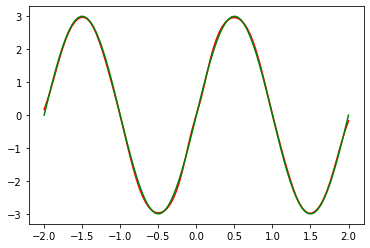

In [144]:

plt.plot(x_testv, a, color='red')
plt.plot(x_testv,3*np.sin(np.pi*x), color= 'green')
plt.show()


# $1 + 2x+ 4x^3$ 

In [125]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        
    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size=tf.shape(data)[0]
        x=tf.random.uniform((batch_size,1),minval=-2,maxval=2)
    
        with tf.GradientTape() as tape: 
            #Compute the loss value
            y_pred = self(x, training=True)
            eq = 1+2*x+4*x**3
            loss= keras.losses.mean_squared_error(eq, y_pred)
        # Apply grads
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Update metrics
        self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
        return {"loss": self.loss_tracker.result()}

In [126]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [127]:
model.summary()

Model: "od_esolver_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 10)                20        
                                                                 
 dense_86 (Dense)            (None, 10)                110       
                                                                 
 dense_87 (Dense)            (None, 10)                110       
                                                                 
 dense_88 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(optimizer = RMSprop(), metrics=['loss'])

x= tf.linspace(-2,2,100)
history = model.fit(x, epochs=1000, verbose=1)

x_testv = tf.linspace(-2,2,100)
a = model.predict(x_testv)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5423
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4643
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4074
Epoch 4/1000
4/4 [==============================] - 0s 836us/step - loss: 0.1996
Epoch 5/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.2416
Epoch 6/1000
4/4 [==============================] - 0s 835us/step - loss: 0.3262
Epoch 7/1000
4/4 [==============================] - 0s 666us/step - loss: 0.3094
Epoch 8/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0923
Epoch 9/1000
4/4 [==============================] - 0s 667us/step - loss: 0.2667
Epoch 10/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.5668
Epoch 11/1000
4/4 [==============================] - 0s 834us/step - loss: 0.6829
Epoch 12/1000
4/4 [==============================] - 0s 666us/step - loss: 0.2493
Epoch 13/1000
4/4 [==========

4/4 [==============================] - 0s 667us/step - loss: 0.0887
Epoch 102/1000
4/4 [==============================] - 0s 835us/step - loss: 0.1050
Epoch 103/1000
4/4 [==============================] - 0s 666us/step - loss: 0.1548
Epoch 104/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0888
Epoch 105/1000
4/4 [==============================] - 0s 669us/step - loss: 0.1087
Epoch 106/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0665
Epoch 107/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0132
Epoch 108/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.1667
Epoch 109/1000
4/4 [==============================] - 0s 835us/step - loss: 0.3235
Epoch 110/1000
4/4 [==============================] - 0s 666us/step - loss: 0.1305
Epoch 111/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0928
Epoch 112/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0906
Epoch 113/1000
4/4 [

Epoch 200/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0721
Epoch 201/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1594
Epoch 202/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0516
Epoch 203/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0988
Epoch 204/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1304
Epoch 205/1000
4/4 [==============================] - 0s 836us/step - loss: 0.0435
Epoch 206/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0601
Epoch 207/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0137
Epoch 208/1000
4/4 [==============================] - 0s 836us/step - loss: 0.1492
Epoch 209/1000
4/4 [==============================] - 0s 1000us/step - loss: 0.0249
Epoch 210/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0549
Epoch 211/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0057
Epo

4/4 [==============================] - 0s 334us/step - loss: 0.0731
Epoch 299/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0515
Epoch 300/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0289
Epoch 301/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0389
Epoch 302/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0678
Epoch 303/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0739
Epoch 304/1000
4/4 [==============================] - 0s 840us/step - loss: 0.1205
Epoch 305/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0097
Epoch 306/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1061
Epoch 307/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0178
Epoch 308/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0077
Epoch 309/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0225
Epoch 310/1000
4/4 

4/4 [==============================] - 0s 666us/step - loss: 0.0137
Epoch 397/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0029
Epoch 398/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0085
Epoch 399/1000
4/4 [==============================] - 0s 667us/step - loss: 0.1266
Epoch 400/1000
4/4 [==============================] - 0s 666us/step - loss: 0.1140
Epoch 401/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0639
Epoch 402/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0077
Epoch 403/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0206
Epoch 404/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0350
Epoch 405/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0361
Epoch 406/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0210
Epoch 407/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0321
Epoch 408/1000
4/4 

Epoch 495/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0180
Epoch 496/1000
4/4 [==============================] - 0s 502us/step - loss: 0.1150
Epoch 497/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0200
Epoch 498/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0165
Epoch 499/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0412
Epoch 500/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0416
Epoch 501/1000
4/4 [==============================] - 0s 667us/step - loss: 0.2022
Epoch 502/1000
4/4 [==============================] - 0s 836us/step - loss: 0.0231
Epoch 503/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0636
Epoch 504/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0079
Epoch 505/1000
4/4 [==============================] - 0s 668us/step - loss: 0.0343
Epoch 506/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0176
Epoc

4/4 [==============================] - 0s 667us/step - loss: 0.0451
Epoch 594/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0570
Epoch 595/1000
4/4 [==============================] - 0s 503us/step - loss: 0.0180
Epoch 596/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0511
Epoch 597/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0252
Epoch 598/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0281
Epoch 599/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0900
Epoch 600/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0370
Epoch 601/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 602/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0293
Epoch 603/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0492
Epoch 604/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0382
Epoch 605/1000
4/4 [=

Epoch 692/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0376
Epoch 693/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0606
Epoch 694/1000
4/4 [==============================] - 0s 834us/step - loss: 0.0196
Epoch 695/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0539
Epoch 696/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0841
Epoch 697/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0423
Epoch 698/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0296
Epoch 699/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0354
Epoch 700/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0398
Epoch 701/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0596
Epoch 702/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0197
Epoch 703/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0083
Epoc

4/4 [==============================] - 0s 333us/step - loss: 0.0499
Epoch 791/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0731
Epoch 792/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0081
Epoch 793/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0069
Epoch 794/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0868
Epoch 795/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0337
Epoch 796/1000
4/4 [==============================] - 0s 836us/step - loss: 0.0795
Epoch 797/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0311
Epoch 798/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0326
Epoch 799/1000
4/4 [==============================] - 0s 502us/step - loss: 0.0329
Epoch 800/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0612
Epoch 801/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0147
Epoch 802/1000
4/4 

Epoch 889/1000
4/4 [==============================] - 0s 837us/step - loss: 0.0869
Epoch 890/1000
4/4 [==============================] - 0s 333us/step - loss: 0.0440
Epoch 891/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0209
Epoch 892/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0232
Epoch 893/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0109
Epoch 894/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0184
Epoch 895/1000
4/4 [==============================] - 0s 836us/step - loss: 0.1140
Epoch 896/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0297
Epoch 897/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 898/1000
4/4 [==============================] - 0s 502us/step - loss: 0.0090
Epoch 899/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0342
Epoch 900/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0478
Epoch 

4/4 [==============================] - 0s 501us/step - loss: 0.0027
Epoch 988/1000
4/4 [==============================] - 0s 666us/step - loss: 0.0063
Epoch 989/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0498
Epoch 990/1000
4/4 [==============================] - 0s 834us/step - loss: 0.0975
Epoch 991/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0626
Epoch 992/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0059
Epoch 993/1000
4/4 [==============================] - 0s 835us/step - loss: 0.0108
Epoch 994/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0099
Epoch 995/1000
4/4 [==============================] - 0s 667us/step - loss: 0.0095
Epoch 996/1000
4/4 [==============================] - 0s 501us/step - loss: 0.2125
Epoch 997/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0524
Epoch 998/1000
4/4 [==============================] - 0s 501us/step - loss: 0.0060
Epoch 999/1000
4/4 [===

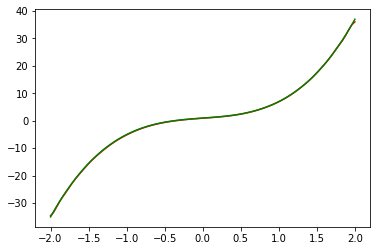

In [134]:
plt.plot(x_testv, a, color='red')
plt.plot(x_testv,1+2*x+4*x**3, color= 'green')
plt.show()
